In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import seaborn as sns
s2010 = pd.read_excel("/Users/amitmishra/Library/Containers/com.microsoft.Excel/Data/Downloads/lfc squad stats.xlsx", sheet_name="Sheet1")
s2010.head()

s2010.shape

s2020 = pd.read_excel("/Users/amitmishra/Library/Containers/com.microsoft.Excel/Data/Downloads/lfc squad stats.xlsx", sheet_name="Sheet2")
s2020.head()

s2010.info()
s2020.info()

s2010.corr()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   30 non-null     object 
 1   Age      30 non-null     int64  
 2   matches  30 non-null     int64  
 3   Starts   30 non-null     int64  
 4   Min      30 non-null     int64  
 5   90s      30 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  29 non-null     object 
 1   Age     29 non-null     int64  
 2   MP      29 non-null     int64  
 3   Starts  29 non-null     int64  
 4   Min     29 non-null     int64  
 5   90s     29 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.5+ KB


,Age,matches,Starts,Min,90s
Age,1.000000,0.505217,0.488198,0.473433,0.472998
matches,0.505217,1.000000,0.935638,0.951175,0.951126
Starts,0.488198,0.935638,1.000000,0.994628,0.994571
Min,0.473433,0.951175,0.994628,1.000000,0.999997
90s,0.472998,0.951126,0.994571,0.999997,1.000000


Text(0, 0.5, 'Minutes Played')

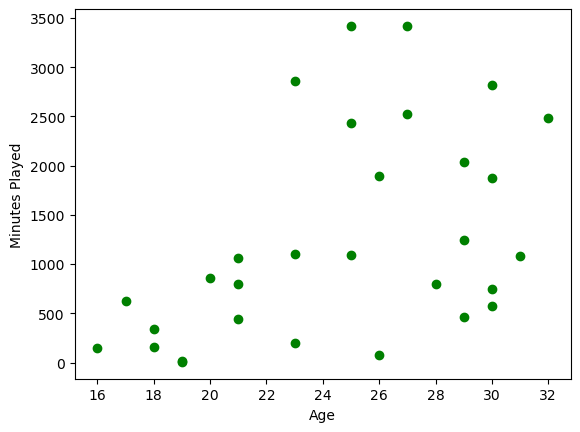

In [5]:
plt.plot(s2010.Age,s2010.Min,"go")
plt.xlabel("Age")
plt.ylabel("Minutes Played in the 2010 season")

Text(0, 0.5, 'Minutes Played')

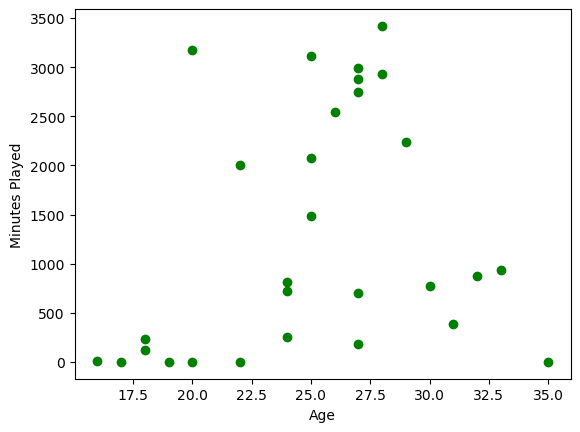

In [7]:
plt.plot(s2020.Age,s2020.Min,"go")
plt.xlabel("Age")
plt.ylabel("Minutes Played in the 2020 season")

In [81]:
'''Note: from the two seasons, 10 year apart, we can infer that the club had a clear goal and used more players in their prime in 2020 compared to 2010 when they were badly managed.'''

'Note: from the two seasons, 10 year apart, we can infer that the club had a clear goal and used more players in their prime in 2020 compared to 2010 when they were badly managed.'

In [8]:
s2010.corr()

,Age,matches,Starts,Min,90s
Age,1.000000,0.505217,0.488198,0.473433,0.472998
matches,0.505217,1.000000,0.935638,0.951175,0.951126
Starts,0.488198,0.935638,1.000000,0.994628,0.994571
Min,0.473433,0.951175,0.994628,1.000000,0.999997
90s,0.472998,0.951126,0.994571,0.999997,1.000000


In [9]:
s2010.describe()

,Age,matches,Starts,Min,90s
count,30.000000,30.000000,30.000000,30.000000,30.00000
mean,24.600000,17.033333,13.933333,1252.500000,13.91000
std,4.724113,11.448485,12.278193,1054.917639,11.72555
min,16.000000,1.000000,0.000000,6.000000,0.10000
25%,21.000000,9.250000,5.000000,448.750000,4.95000
50%,25.000000,15.000000,10.000000,962.500000,10.70000
75%,29.000000,27.250000,23.500000,1998.250000,22.20000
max,32.000000,38.000000,38.000000,3420.000000,38.00000


In [10]:
s2020.describe()

,Age,MP,Starts,Min,90s
count,29.000000,29.000000,29.000000,29.000000,29.000000
mean,25.034483,18.793103,14.413793,1296.724138,14.417241
std,4.924304,14.253770,13.975788,1229.134419,13.660660
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,6.000000,2.000000,185.000000,2.100000
50%,25.000000,18.000000,9.000000,815.000000,9.100000
75%,28.000000,30.000000,29.000000,2543.000000,28.300000
max,35.000000,38.000000,38.000000,3420.000000,38.000000


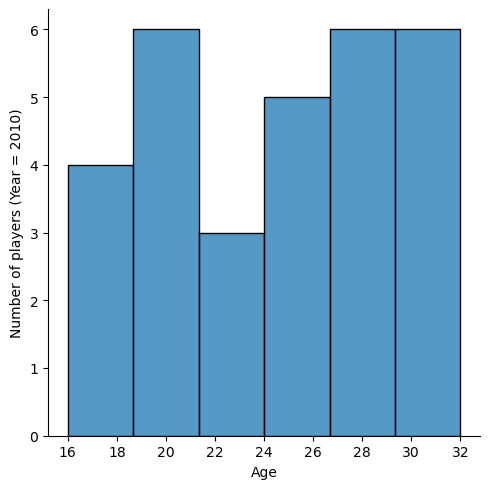

In [98]:
my2010plot = sns.displot(data = s2010.Age)
my2010plot.set_axis_labels("Age","Number of players (Year = 2010)")

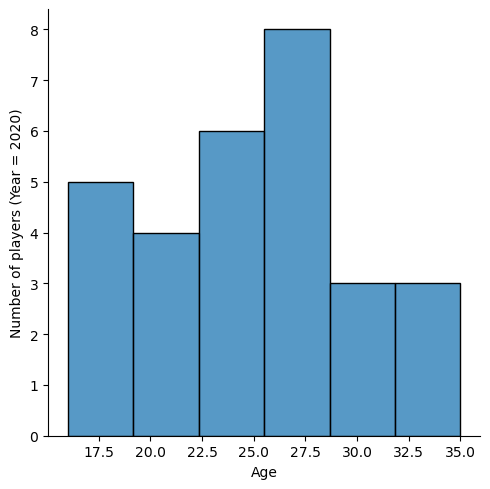

In [99]:
my2020plot = sns.displot(s2020.Age)
my2020plot.set_axis_labels("Age","Number of players (Year = 2020)")

# Performing regression

In [15]:
import statsmodels.formula.api as smf

In [49]:
model1 = smf.ols("Min~Age", data = s2020).fit()

#how to run regression; fit() is nothing but applying the linear regression on the data.

In [17]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Min'>

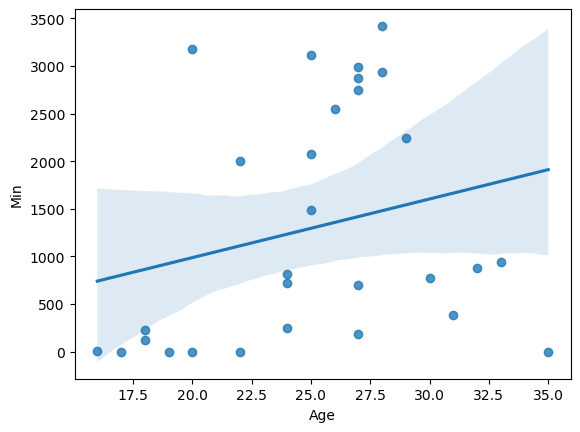

In [50]:
sns.regplot(x ="Age", y="Min", data = s2020)

In [51]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Min   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.751
Date:                Sat, 04 Feb 2023   Prob (F-statistic):              0.197
Time:                        19:49:00   Log-Likelihood:                -246.04
No. Observations:                  29   AIC:                             496.1
Df Residuals:                      27   BIC:                             498.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -245.5106   1186.938     -0.207      0.838   -2680.907    2189.886
Age           61.6044     46.551      1.323      0.197     -33.910     157.118
==============================================================================
Omnibus:                        7.464   Durbin-Watson:                   0.154
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                2.837
Skew:                           0.440   Prob(JB):                        0.242
Kurtosis:                       1.745   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Making a prediction

In [100]:
#Taking an age input from user and predicting the expected minutes based on Liverpool's average 2020 season's stats

inputage = int(input())
if inputage < 16:
    print("You are too young to make an appearance")
elif inputage > 36:
        print("You are too old to make an appearance")

app_pred = pd.Series([inputage])
app_pred = pd.DataFrame(app_pred,columns = ['Age'])
mins_exp = model1.predict(app_pred)
print("Your expected minutes are: {}".format(mins_exp[0]))

25
Your expected minutes are: 1294.5998476383947
